# Module 02: A Box Model Carbon Assignment

## Abby Sigurdson

### 1. Introduction

In the accompanying notebook [mod02-CarbonModel1.ipynb](./mod02-CarbonModel1.ipynb) and in class we developed a relatively simple model of global carbon balance that assumed that tracked carbon in the atmosphere and biosphere. The system of equations we developed to describe this system are shown below,

$$
\begin{align*}
\frac{dM_1}{dt} &= F_{21} - F_{12}\\
&= k_{21}M_2 - k_{12}M_1
\end{align*}
$$

and,

$$
\begin{align*}
\frac{dM_2}{dt} &= F_{12} - F_{21}\\
&= k_{12}M_1 - k_{21}M_2
\end{align*}
$$

where $M_1$ is the mass of carbon in the atmosphere (GtC), $M_2$ is the mass of carbon in the biosphere (GtC), $F_{12}$ is the flux of carbon from the atmosphere to the biosphere due to photosynthesis (GtC/yr), and $F_{21}$ is the flux of carbon from the biosphere to the atmosphere due to decay and respiration (GtC/yr).

In that notebook we develop a numerical model to describe that system, run it for given initial conditions and with no external inputs of carbon (we call this an "unforced" scenario) and compare it to the analytical solution. We observed that as the time step increased, we departed further from the analytical solution. 

In this assignment you will take your model one step more realistic by ensuring that the photosynthetic flux depends on both the amount of carbon in the atmosphere and in the biosphere. Then you will examine the impact of anthropogenic emissions from 1751-2008 on the biosphere and atmosphere, and how alternative future scenarios of emissions mitigation affect your system. 

The code cell below contains a couple of new commands and some file names that you will need in this assignment. You will need all of these commands, _but not necessarily

In [1]:
#import numpy as np
#import matplotlib.pyplot as plt

#historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv'
#data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html
#year = data[:,0]
#cflux = data[:,1]

#cflux_t = np.interp(t, year, cflux)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.interp.html

#np.diff(M1)
# Read this documentation to understand what this command does: 
#    https://numpy.org/doc/stable/reference/generated/numpy.diff.html

## 2. Assignment Tasks

For all plots, label all axes and provide units.

__Problem A: Modify and rerun the model__

1. Modify the model so that the photosynthesis flux includes the mass of carbon in the land (i.e., $M_2$). Use the following parameters:

  * $M_1^0$ = 1100.0 
  * $M_2^0$ = 300.0 
  * $k_{12}$ = 0.0003 
  * $k_{21}$ = 0.1  

2. Repeat the "unforced" (i.e., no anthropogenic emissions) simulation above, but run the model for `t = 100` years with a daily time step (i.e., `dt = 1/365`)
3. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation

__Problem B: Examine impacts of human emissions__

1. Load the anthropogenic emissions data for 1751-2008 (see numpy `np.loadtxt()` command usage [here](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)). Note that the data is in a comma separated variable file (named `AnthropogenicEmissions.1751_2008.csv`) with one header row.
2. Plot the anthropogenic emissions data  
3. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __A(3)__ above, simulate the response of the carbon system to the anthropogenic emissions from 1751 to 2008 by adding an appropriate source term in the system of equations. Create the following plots:

  * Mass of C in the atmosphere versus time 
  * Mass of C in the land versus time 
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 
    
4. Use the `print()` command to print out the value of $M_1$ and $M_2$ at the end of the simulation in 2008.

__Problem C: Examine the effects of mitigation__

1. Load the alternative emission scenarios contained in the file `.csv`, which represent three pathways to net zero emissions: (a) net zero emissions by the year 2030 (column 2), (c) net zero emissions by 2050 (column 3), and zero emissions growth (i.e., constant emissions) starting in 2008 (column 4).
2. Starting from the initial conditions ($M_1^0$ and $M_2^0$) corresponding to the final conditions noted in part __B(4)__ above, run the model three times, one for each scenario. Create the following plots: 

  * Mass of C in the atmosphere versus time (all three scenarios on one plot)
  * Mass of C in the land versus time (all three scenarios on one plot)
  * The change in mass of C in the atmosphere vs time 
  * The change in mass of C in the biosphere vs time 


In [2]:
#future_emissions_file = 'EmissionsMitigationScenarios.csv'

#data = np.loadtxt()
#year = data[:,0]
#cflux_nz2030 = data[:,1]
#cflux_nz2050 = data[:,2]
#cflux_zeg = data[:,3]

# Solution

## Problem A

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Initial Conditions

M1i = 1100.0 # Initial mass of carbon in atmosphere [GtC]
M2i = 300.0 # Initial mass of carbon in bioshpere [GtC]

k12 = 0.0003 # Rate of flux atmosphere to biosphere [1/yr]
k21 = 0.1 # Rate of flux biosphere to atmosphere [1/yr]

ti = 0.0 # Initial time [yr]
tf = 100.0 # End time [yr]
dt = 1/365 # Time step [yr]

#Set up containers

t = np.arange(ti,tf+dt,dt) # Create an array 
Nt = t.size # Determine the size of the array

print('t has '+str(Nt)+' time steps\n') # Print the number of time steps required for the model

M1_p = np.zeros((Nt,)) # Create a container for the mass of carbon in the atmosphere
M2_p = np.zeros((Nt,)) # Create a container for the mass of carbon in the biosphere

#Solve system of equations for M1 and M2 at t with photosynthesis dependent on both M1 and M2

for i in np.arange(Nt): 
    if (i==0): #if at the initial time, the mass of carbon is equal to the inital values

        M1_p[i] = M1i 
        M2_p[i] = M2i
                
    else: #if not at the initial time then the mass needs to be calculated as described at the begining
        dM1dt_p = k21*M2_p[i-1] - k12*M1_p[i-1]*M2_p[i-1] #calculate the rate of change of M1 at the ith time step
        dM2dt_p = k12*M1_p[i-1]*M2_p[i-1] - k21*M2_p[i-1] #calculate the rate of change of M2 at the ith time step
        
        M1_p[i] = M1_p[i-1] + dM1dt_p*dt #calculate M1 at the ith time step
        M2_p[i] = M2_p[i-1] + dM2dt_p*dt #calculate M2 at the ith time step
        
print('The final mass of carbon in the atmosphere is '+str(M1_p[-1])+' [GtC]\n')
print('The final mass of carbon in the land is '+str(M2_p[-1])+' [GtC]')

t has 36501 time steps

The final mass of carbon in the atmosphere is 333.3333333333658 [GtC]

The final mass of carbon in the land is 1066.6666666665792 [GtC]


## Problem B

Text(0.5, 0, 'Time [yr]')

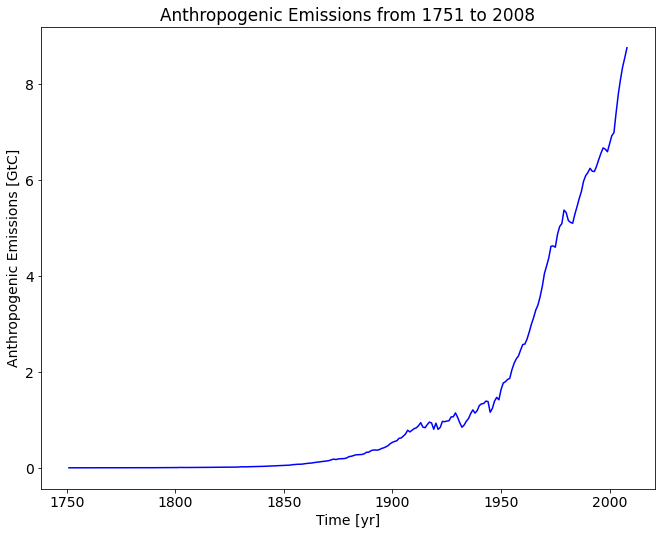

In [4]:
historical_emissions_file = 'AnthropogenicEmissions.1751_2008.csv' # Loading anthropogenic emission data
data = np.loadtxt(historical_emissions_file, delimiter=',', skiprows=1)
year = data[:,0] # Years are in the first column
cflux = data[:,1] # Emissions are in the second column

# Plot anthropogenic emissions data

plt.figure(figsize=(11,8.5)) # Create figure for the graphs
plt.rcParams.update({'font.size': 14})
plt.title('Anthropogenic Emissions from 1751 to 2008')
plt.plot(year,cflux,'b-') # Plot the cflux versus the year
plt.ylabel('Anthropogenic Emissions [GtC]') 
plt.xlabel('Time [yr]') 

In [5]:
M1i_a = M1_p[-1] # Use final M1 & M2 from problem A as initial conditions
M2i_a = M2_p[-1]

# New initial conditions for time
ti_a = 1751
tf_a = 2008
dt_a = 1/365 # Time step [yr]



t_a = np.arange(ti_a,tf_a+dt_a,dt_a) # Create an array
Nt_a = t_a.size + 1 # Determine the size of the array; +1 needed for diff calc

print('t has '+str(Nt_a)+' time steps\n')

cflux_t = np.interp(t_a,year,cflux) # Interpolate the emissions data for the each time step in the model

M1_a = np.zeros((Nt_a,)) # Create a container for the mass of carbon in the atmosphere
M2_a = np.zeros((Nt_a,)) # Create a container for the mass of carbon in the biosphere



for i in np.arange(Nt_a): 
    if (i==0): # If at the initial time, the mass of carbon is equal to the inital values

        M1_a[i] = M1i_a 
        M2_a[i] = M2i_a
        
    else: # If not at the initial time then the mass needs to be calculated as described at the begining
        dM1dt_a = k21*M2_a[i-1] - k12*M1_a[i-1]*M2_a[i-1] + cflux_t[i-1] # Calculate the rate of change of M1 at the ith time step
        dM2dt_a = k12*M1_a[i-1]*M2_a[i-1] - k21*M2_a[i-1] # Calculate the rate of change of M2 at the ith time step
        
        M1_a[i] = M1_a[i-1] + dM1dt_a*dt_a # Calculate M1 at the ith time step
        M2_a[i] = M2_a[i-1] + dM2dt_a*dt_a # Calculate M2 at the ith time step

# Diff in carbon for plots 3 & 4

dM1_a = np.diff(M1_a)
dM2_a = np.diff(M2_a)

# Realign indices with t
M1_a = M1_a[0:i]
M2_a = M2_a[0:i]

print('The final mass of carbon in the atmosphere is '+str(M1_a[-1])+' [GtC]\n')
print('The final mass of carbon in the land is '+str(M2_a[-1])+' [GtC]')

t has 93807 time steps

The final mass of carbon in the atmosphere is 353.22824788827904 [GtC]

The final mass of carbon in the land is 1389.1417712620218 [GtC]


#### Plots

Text(0.5, 0, 'Time [yr]')

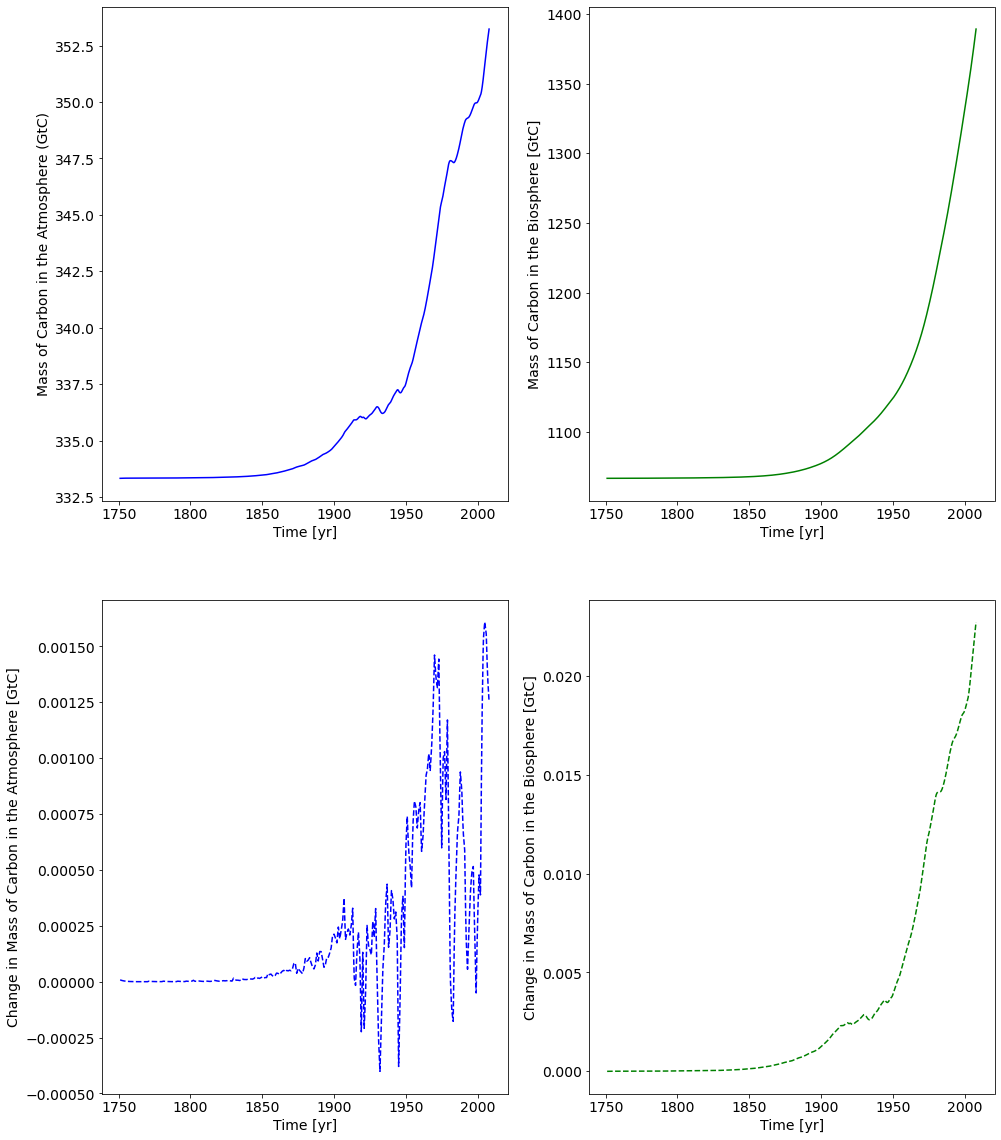

In [6]:
plt.figure(figsize=(16,20))
plt.rcParams.update({'font.size': 14})

plt.subplot(2,2,1) #plot mass of carbon in the atmosphere versus time
plt.plot(t_a,M1_a,'b-')
plt.ylabel('Mass of Carbon in the Atmosphere (GtC)')
plt.xlabel('Time [yr]')

plt.subplot(2,2,2) #plot mass of carbon in the biosphere versus time
plt.plot(t_a,M2_a,'g-')
plt.ylabel('Mass of Carbon in the Biosphere [GtC]')
plt.xlabel('Time [yr]')

plt.subplot(2,2,3) #plot change in mass of carbon in the atmosphere versus time
plt.plot(t_a,dM1_a,'b--')
plt.ylabel('Change in Mass of Carbon in the Atmosphere [GtC]')
plt.xlabel('Time [yr]')

plt.subplot(2,2,4) #plot change in mass of carbon in the biosphere versus time
plt.plot(t_a,dM2_a,'g--')
plt.ylabel('Change in Mass of Carbon in the Biosphere [GtC]')
plt.xlabel('Time [yr]')

## Problem C

In [7]:
future_emissions_file = 'EmissionsMitigationScenarios.2008_2100.csv'

data = np.loadtxt(future_emissions_file, delimiter=',', skiprows=1)
year = data[:,0]
cflux_nz2030 = data[:,1]
cflux_nz2050 = data[:,2]
cflux_zeg = data[:,3]

# Initial Conditions
M1i_c = M1_a[-1]
M2i_c = M1_a[-1]

ti_c = 2008
tf_c = 2100
dt_c = 1/365

t_c = np.arange(ti_c,tf_c+dt_c,dt_c) # Create an array
Nt_c = t_c.size + 1 # Determine the size of the array
print('t has '+str(Nt_c)+' time steps')

t has 33582 time steps


### Net Zero by 2030

In [9]:
cflux_tc30 = np.interp(t_c,year,cflux_nz2030) # Interpolate the emissions data for the each time step in the model

#Create new containers

M1_c30 = np.zeros((Nt_c,)) # Create a container for the mass of carbon in the atmosphere
M2_c30 = np.zeros((Nt_c,)) # Create a container for the mass of carbon in the biosphere


for i in np.arange(Nt_c): 
    if (i==0): # If at the initial time, the mass of carbon is equal to the inital values

        M1_c30[i] = M1i_c 
        M2_c30[i] = M2i_c
        
    else: # If not at the initial time then the mass needs to be calculated as described at the begining
        dM1dt_c30 = k21*M2_c30[i-1] - k12*M1_c30[i-1]*M2_c30[i-1] + cflux_tc30[i-1] # Calculate the rate of change of M1 at the ith time step
        dM2dt_c30 = k12*M1_c30[i-1]*M2_c30[i-1] - k21*M2_c30[i-1] # Calculate the rate of change of M2 at the ith time step
        
        M1_c30[i] = M1_c30[i-1] + dM1dt_c30*dt_c # Calculate M1 at the ith time step
        M2_c30[i] = M2_c30[i-1] + dM2dt_c30*dt_c # Calculate M2 at the ith time step

# Diff in carbon for plots 3 & 4
dM1_c30 = np.diff(M1_c30)
dM2_c30 = np.diff(M2_c30)

# Realign indices with t
M1_c30 = M1_c30[0:i]
M2_c30 = M2_c30[0:i]

print('The final mass of carbon in the atmosphere is '+str(M1_c30[-1])+' [GtC]\n')
print('The final mass of carbon in the biosphere is '+str(M2_c30[-1])+' [GtC]')

The final mass of carbon in the atmosphere is 333.33445593352235 [GtC]

The final mass of carbon in the biosphere is 469.299524775941 [GtC]


### Net Zero by 2050

In [11]:
cflux_tc50 = np.interp(t_c,year,cflux_nz2050) # Interpolate the emissions data for the each time step in the model

#Create new containers

M1_c50 = np.zeros((Nt_c,)) # Create a container for the mass of carbon in the atmosphere
M2_c50 = np.zeros((Nt_c,)) # Create a container for the mass of carbon in the biosphere


for i in np.arange(Nt_c): 
    if (i==0): # If at the initial time, the mass of carbon is equal to the inital values

        M1_c50[i] = M1i_c 
        M2_c50[i] = M2i_c
        
    else: # If not at the initial time then the mass needs to be calculated as described at the begining
        dM1dt_c50 = k21*M2_c50[i-1] - k12*M1_c50[i-1]*M2_c50[i-1] + cflux_tc50[i-1] # Calculate the rate of change of M1 at the ith time step
        dM2dt_c50 = k12*M1_c50[i-1]*M2_c50[i-1] - k21*M2_c50[i-1] # Calculate the rate of change of M2 at the ith time step
        
        M1_c50[i] = M1_c50[i-1] + dM1dt_c50*dt # Calculate M1 at the ith time step
        M2_c50[i] = M2_c50[i-1] + dM2dt_c50*dt # Calculate M2 at the ith time step

# Diff in carbon for plots 3 & 4
dM1_c50 = np.diff(M1_c50)
dM2_c50 = np.diff(M2_c50)

# Realign indices with t
M1_c50 = M1_c50[0:i]
M2_c50 = M2_c50[0:i]

print('The final mass of carbon in the atmosphere is '+str(M1_c50[-1])+' [GtC]\n')
print('The final mass of carbon in the biosphere is '+str(M2_c50[-1])+' [GtC]')

The final mass of carbon in the atmosphere is 333.335383592792 [GtC]

The final mass of carbon in the biosphere is 557.128597117947 [GtC]


### Zero Emission Growth

In [14]:
cflux_tzeg = np.interp(t_c,year,cflux_zeg) #interpolate the emissions data for the each time step in the model

#Create new containers

M1_zeg = np.zeros((Nt_c,)) #create a container for the mass of carbon in the atmosphere
M2_zeg = np.zeros((Nt_c,)) #create a container for the mass of carbon in the biosphere

#Solve system of equations

for i in np.arange(Nt_c): 
    if (i==0): #if at the initial time, the mass of carbon is equal to the inital values

        M1_zeg[i] = M1i_c 
        M2_zeg[i] = M2i_c
        
    else: #if not at the initial time then the mass needs to be calculated as described at the begining
        dM1dt_zeg = k21*M2_zeg[i-1] - k12*M1_zeg[i-1]*M2_zeg[i-1] + cflux_tzeg[i-1] #calculate the rate of change of M1 at the ith time step
        dM2dt_zeg = k12*M1_zeg[i-1]*M2_zeg[i-1] - k21*M2_zeg[i-1] #calculate the rate of change of M2 at the ith time step
        
        M1_zeg[i] = M1_zeg[i-1] + dM1dt_zeg*dt #calculate M1 at the ith time step
        M2_zeg[i] = M2_zeg[i-1] + dM2dt_zeg*dt #calculate M2 at the ith time step

#need to find diff in carbon for plots 3 & 4

dM1_zeg = np.diff(M1_zeg)
dM2_zeg = np.diff(M2_zeg)

#need to realign indices with t
M1_zeg = M1_zeg[0:i]
M2_zeg = M2_zeg[0:i]

print('The final mass of carbon in the atmosphere is '+str(M1_zeg[-1])+' GtC\n')
print('The final mass of carbon in the biosphere is '+str(M2_zeg[-1])+' GtC')

The final mass of carbon in the atmosphere is 359.26071924384183 GtC

The final mass of carbon in the biosphere is 1152.1037765327042 GtC


#### Plots

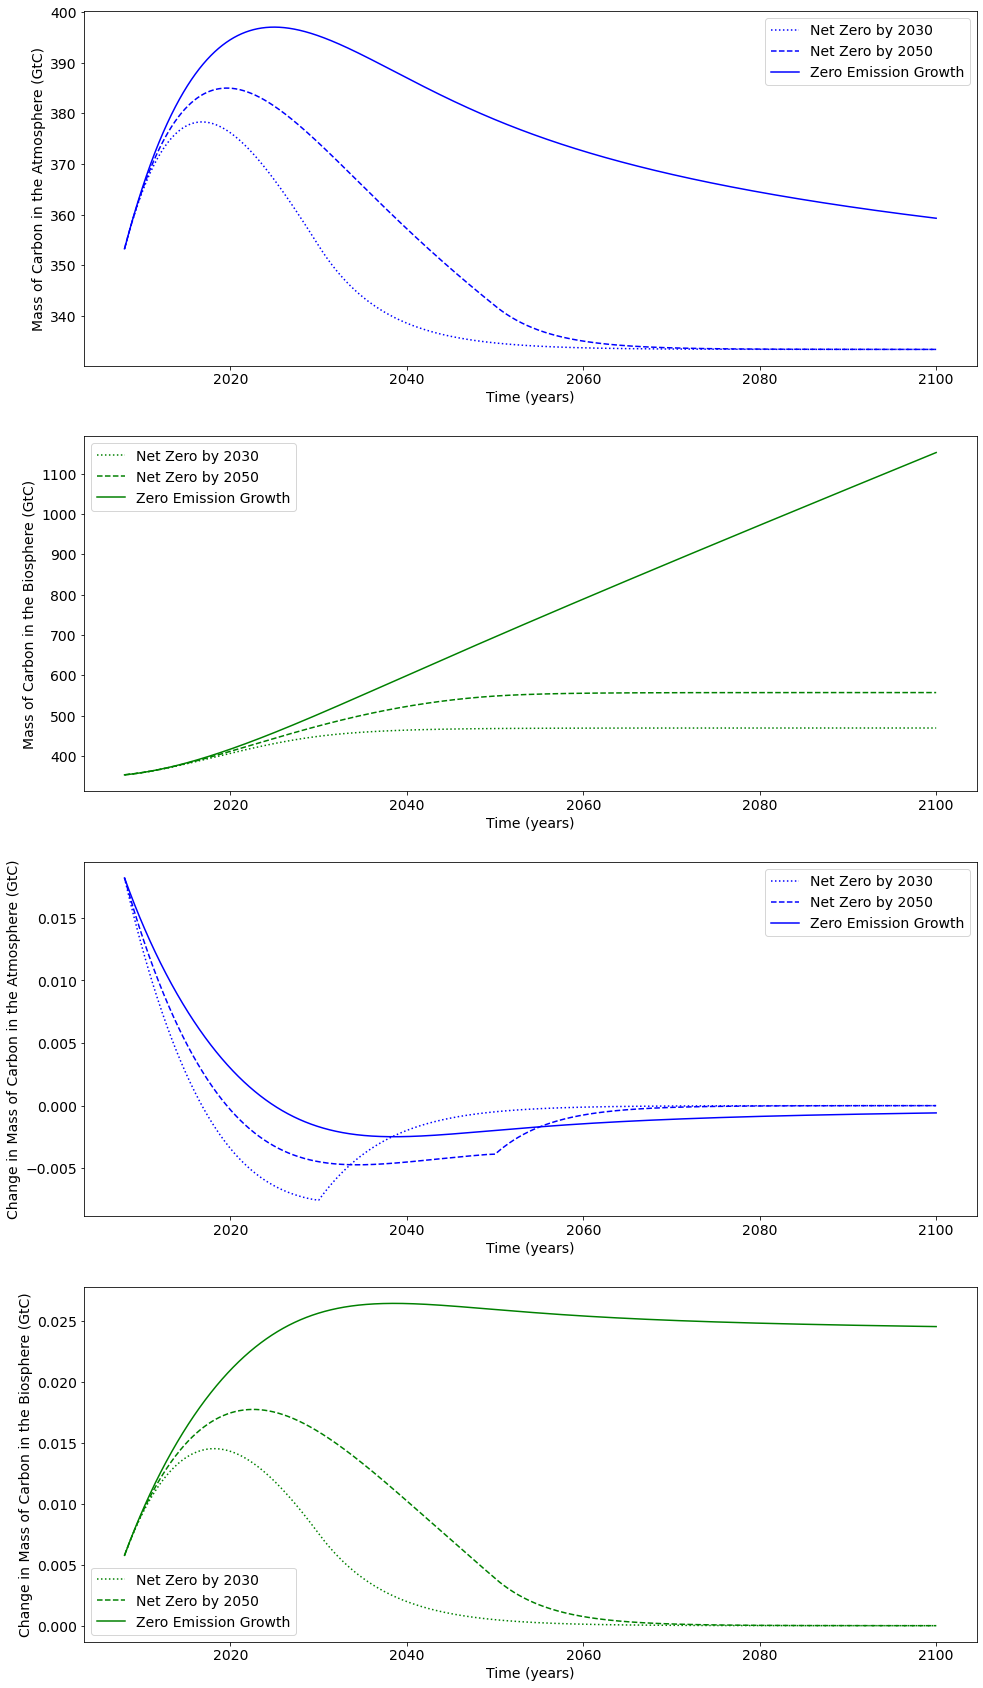

In [15]:

plt.figure(figsize=(16,30))
plt.rcParams.update({'font.size': 14})

plt.subplot(4,1,1) #plot mass of carbon in the atmosphere versus time
plt.plot(t_c,M1_c30,'b:',label='Net Zero by 2030')
plt.plot(t_c,M1_c50,'b--',label='Net Zero by 2050')
plt.plot(t_c,M1_zeg,'b-',label='Zero Emission Growth')
plt.ylabel('Mass of Carbon in the Atmosphere (GtC)')
plt.xlabel('Time (years)')
plt.legend()

plt.subplot(4,1,2) #plot mass of carbon in the biosphere versus time
plt.plot(t_c,M2_c30,'g:',label='Net Zero by 2030')
plt.plot(t_c,M2_c50,'g--',label='Net Zero by 2050')
plt.plot(t_c,M2_zeg,'g-',label='Zero Emission Growth')
plt.ylabel('Mass of Carbon in the Biosphere (GtC)')
plt.xlabel('Time (years)')
plt.legend()

plt.subplot(4,1,3) #plot change in mass of carbon in the atmosphere versus time
plt.plot(t_c,dM1_c30,'b:',label='Net Zero by 2030')
plt.plot(t_c,dM1_c50,'b--',label='Net Zero by 2050')
plt.plot(t_c,dM1_zeg,'b-',label='Zero Emission Growth')
plt.ylabel('Change in Mass of Carbon in the Atmosphere (GtC)')
plt.xlabel('Time (years)')
plt.legend()

plt.subplot(4,1,4) #plot change in mass of carbon in the biosphere versus time
plt.plot(t_c,dM2_c30,'g:',label='Net Zero by 2030')
plt.plot(t_c,dM2_c50,'g--',label='Net Zero by 2050')
plt.plot(t_c,dM2_zeg,'g-',label='Zero Emission Growth')
plt.ylabel('Change in Mass of Carbon in the Biosphere (GtC)')
plt.xlabel('Time (years)')
plt.legend()